In [1]:
import os
import pandas as pd
import numpy as np

os.chdir('/Users/tandemyoung/Library/CloudStorage/OneDrive-UniversityofArkansas/Project Proposal - Arya/Data')

#os.chdir('/Users/shreyashgupta/Library/CloudStorage/OneDrive-UniversityofArkansas/MSEA/ECON 5783 - APPLIED MICROECONOMETRICS/Project Proposal - Arya/Data')


In [2]:
# Load the datasets
title_basics = pd.read_csv('IMDb Basics.tsv', sep='\t', low_memory=False)
name_basics = pd.read_csv('IMDb Name Basics.tsv', sep='\t', low_memory=False)
title_ratings = pd.read_csv('IMDb Ratings.tsv', sep='\t', low_memory=False)
title_principals = pd.read_csv('IMDb Title Principals.tsv', sep='\t', low_memory=False)

# Merging the datasets
merged_data1 = pd.merge(title_basics, title_ratings, on='tconst')
merged_data2 = pd.merge(merged_data1, title_principals, on='tconst')
merged_df = pd.merge(merged_data2, name_basics, on='nconst')

# You can now perform operations on the final_merged_data dataframe

In [ ]:
merged_df


In [ ]:
# basics = pd.read_csv('IMDb Basics.tsv', delimiter='\t', low_memory=False)
# basics = pd.DataFrame(basics)
# basics

In [ ]:
# name_basics = pd.read_csv('IMDb Name Basics.tsv', delimiter='\t', low_memory=False)
# name_basics = pd.DataFrame(name_basics)
# name_basics

In [3]:
# # Assuming name_basics is your DataFrame and 'primaryProfession' is the column
merged_df['is_actress'] = merged_df['primaryProfession'].apply(lambda x: 1 if 'actress' in str(x).split(',') else 0)

# # This will create a new column 'is_actress' with 1 where 'primaryProfession' contains 'actress' and 0 otherwise
# name_basics

In [ ]:
# ratings = pd.read_csv('IMDb Ratings.tsv',delimiter='\t', low_memory=False)
# ratings = pd.DataFrame(ratings)
# ratings

In [ ]:
# title_akas = pd.read_csv('IMDb Title Akas.tsv',delimiter='\t', low_memory=False)
# title_akas = pd.DataFrame(title_akas)
# title_akas

In [ ]:
# title_akas.rename(columns={'titleId': 'tconst'}, inplace=True)

In [ ]:
# title_akas

In [ ]:
# crew = pd.read_csv('IMDb Title Crew.tsv',delimiter='\t', low_memory=False)
# crew = pd.DataFrame(crew)
# crew

In [ ]:
# merged_df = pd.merge(basics, crew, on='tconst', how='inner')
# merged_df_2 = pd.merge(merged_df, ratings, on='tconst', how='inner')
# #final_merged_df = pd.merge(merged_df_2, title_akas, on='tconst', how='left')

In [ ]:
# merged_df_2

In [ ]:
# # Split the 'knownForTitles' into individual identifiers and create a new row for each
# name_basics_expanded = name_basics.explode('knownForTitles'.split(','))
# name_basics_expanded

In [ ]:
# # Merge the expanded name_basics DataFrame with titles_df
# merged_df = pd.merge(name_basics_expanded, merged_df_2, left_on='knownForTitles', right_on='tconst')

In [ ]:
# merged_df

In [ ]:
# merged_df['endYear'].unique()

In [4]:
# Assuming name_basics is your DataFrame
number_of_actresses = merged_df['is_actress'].sum()

print("Number of actresses:", number_of_actresses)


Number of actresses: 2171669


In [5]:
# Convert 'startYear' to integers, handling non-numeric values as NaN (errors='coerce')
merged_df['startYear'] = pd.to_numeric(merged_df['startYear'], errors='coerce')

# Create the new column with 1 if 'startYear' is after 2017, 0 otherwise
merged_df['is_after_2017'] = merged_df['startYear'].apply(lambda x: 1 if x > 2017 else 0)

# If there were non-numeric values in 'startYear', you might want to handle NaN values in 'is_after_2017'
# For example, replacing NaN with 0 (optional)
merged_df['is_after_2017'].fillna(0, inplace=True)


In [ ]:
merged_df

In [ ]:
# exists = (merged_df['primaryName'] == 'Harvey Weinstein').any()
# print(exists)

In [ ]:
# merged_df['genres'].unique()

In [ ]:
# with pd.option_context('display.max_rows', None):
#     print(merged_df['genres'].unique())

In [ ]:
# unique_genres = list(merged_df['genres'].unique())
# print(unique_genres)

In [6]:
merged_df['is_action'] = merged_df['genres'].str.contains('Action', na=False).astype(int)
merged_df['is_drama'] = merged_df['genres'].str.contains('Drama', na=False).astype(int)
merged_df['is_romance'] = merged_df['genres'].str.contains('Romance', na=False).astype(int)
merged_df['is_scifi'] = merged_df['genres'].str.contains('Sci-Fi', na=False).astype(int)
merged_df['is_comedy'] = merged_df['genres'].str.contains('Comedy', na=False).astype(int)
merged_df['is_adventure'] = merged_df['genres'].str.contains('Adventure', na=False).astype(int)
merged_df['is_documentary'] = merged_df['genres'].str.contains('Documentary', na=False).astype(int)
merged_df['is_fantasy'] = merged_df['genres'].str.contains('Fantasy', na=False).astype(int)
merged_df['is_history'] = merged_df['genres'].str.contains('History', na=False).astype(int)
merged_df['is_horror'] = merged_df['genres'].str.contains('Horror', na=False).astype(int)
merged_df['is_biography'] = merged_df['genres'].str.contains('Biography', na=False).astype(int)

In [7]:
merged_df['isAdult'] = pd.to_numeric(merged_df['isAdult'], errors='coerce')
merged_df['runtimeMinutes'] = pd.to_numeric(merged_df['runtimeMinutes'], errors='coerce')
merged_df['birthYear'] = pd.to_numeric(merged_df['birthYear'], errors='coerce')
merged_df['endYear'] = pd.to_numeric(merged_df['endYear'], errors='coerce')

In [8]:
merged_df

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,...,is_drama,is_romance,is_scifi,is_comedy,is_adventure,is_documentary,is_fantasy,is_history,is_horror,is_biography
0,tt0000001,short,Carmencita,Carmencita,0,1894.0,NaN,1.0,"Documentary,Short",5.7,...,0,0,0,0,0,1,0,0,0,0
1,tt0000001,short,Carmencita,Carmencita,0,1894.0,NaN,1.0,"Documentary,Short",5.7,...,0,0,0,0,0,1,0,0,0,0
2,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893.0,NaN,1.0,"Comedy,Short",6.2,...,0,0,0,1,0,0,0,0,0,0
3,tt0000006,short,Chinese Opium Den,Chinese Opium Den,0,1894.0,NaN,1.0,Short,5.0,...,0,0,0,0,0,0,0,0,0,0
4,tt0000007,short,Corbett and Courtney Before the Kinetograph,Corbett and Courtney Before the Kinetograph,0,1894.0,NaN,1.0,"Short,Sport",5.4,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11327764,tt9916730,movie,6 Gunn,6 Gunn,0,2017.0,NaN,116.0,Drama,7.6,...,1,0,0,0,0,0,0,0,0,0
11327765,tt9916730,movie,6 Gunn,6 Gunn,0,2017.0,NaN,116.0,Drama,7.6,...,1,0,0,0,0,0,0,0,0,0
11327766,tt9916730,movie,6 Gunn,6 Gunn,0,2017.0,NaN,116.0,Drama,7.6,...,1,0,0,0,0,0,0,0,0,0
11327767,tt9916730,movie,6 Gunn,6 Gunn,0,2017.0,NaN,116.0,Drama,7.6,...,1,0,0,0,0,0,0,0,0,0


In [9]:
# Check for missing values
print(merged_df.isnull().sum())

# Option 1: Drop rows with missing values
merged_df = merged_df.dropna()

# Option 2: Fill missing values, e.g., with the mean or median
#female_lead_df = female_lead_df.fillna(female_lead_df.mean())


tconst                      0
titleType                   0
primaryTitle                0
originalTitle               0
isAdult                     0
startYear                1882
endYear              10913183
runtimeMinutes        3016409
genres                     29
averageRating               0
numVotes                    0
ordering                    0
nconst                      0
category                    0
job                         0
characters                  0
primaryName                 0
birthYear             5557650
deathYear                   0
primaryProfession      375448
knownForTitles              0
is_actress                  0
is_after_2017               0
is_action                   0
is_drama                    0
is_romance                  0
is_scifi                    0
is_comedy                   0
is_adventure                0
is_documentary              0
is_fantasy                  0
is_history                  0
is_horror                   0
is_biograp

In [ ]:
# MODEL WITHOUT CONTROLS

In [10]:
import statsmodels.api as sm

# Assuming merged_df is your DataFrame
# Filter to include only films with female leads
#female_lead_df = merged_df[merged_df['is_actress'] == 1]

# Running variable: time (year)
merged_df['running_variable'] = merged_df['startYear'] - 2017

# Interaction term
merged_df['interaction'] = merged_df['running_variable'] * merged_df['is_after_2017']

# Selecting relevant columns
X = merged_df[['is_after_2017', 'interaction', 'is_actress']]  # Add other controls as needed
X = sm.add_constant(X)  # Adds a constant term to the regression
y = merged_df['averageRating']

# Fitting the model
model = sm.OLS(y, X).fit()

# Viewing the results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          averageRating   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     259.6
Date:                Mon, 27 Nov 2023   Prob (F-statistic):          3.69e-168
Time:                        12:48:28   Log-Likelihood:            -2.9362e+05
No. Observations:              183602   AIC:                         5.872e+05
Df Residuals:                  183598   BIC:                         5.873e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             6.9874      0.004   1903.110

/var/folders/g5/r6m7zvh93m972bmk3vx2jztr0000gn/T/ipykernel_6015/1273226445.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['running_variable'] = merged_df['startYear'] - 2017
/var/folders/g5/r6m7zvh93m972bmk3vx2jztr0000gn/T/ipykernel_6015/1273226445.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['interaction'] = merged_df['running_variable'] * merged_df['is_after_2017']


In [11]:
merged_df

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,...,is_scifi,is_comedy,is_adventure,is_documentary,is_fantasy,is_history,is_horror,is_biography,running_variable,interaction
4341,tt1227808,tvSeries,Adventures of Puss-in-Boots,Nagagutsu o haita neko no bôken,0,1992.0,1992.0,30.0,"Adventure,Animation,Fantasy",8.2,...,0,0,1,0,1,0,0,0,-25.0,-0.0
7183,tt0096536,tvMiniSeries,Around the World in 80 Days,Around the World in 80 Days,0,1989.0,1989.0,49.0,Documentary,8.6,...,0,0,0,1,0,0,0,0,-28.0,-0.0
8950,tt1213218,tvSeries,Batman: The Brave and the Bold,Batman: The Brave and the Bold,0,2008.0,2011.0,30.0,"Action,Adventure,Animation",7.3,...,0,0,1,0,0,0,0,0,-9.0,-0.0
12715,tt0045408,tvSeries,Life with Father,Life with Father,0,1953.0,1955.0,30.0,"Comedy,Family",8.3,...,0,1,0,0,0,0,0,0,-64.0,-0.0
16935,tt0043170,tvSeries,Adventures of Wild Bill Hickok,Adventures of Wild Bill Hickok,0,1951.0,1958.0,30.0,"Family,Western",7.8,...,0,0,0,0,0,0,0,0,-66.0,-0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11324189,tt9810596,tvSeries,Lavender,Lavender,0,2001.0,2002.0,45.0,"Drama,Romance",6.5,...,0,0,0,0,0,0,0,0,-16.0,-0.0
11324695,tt9826628,tvSeries,Yemin,Yemin,0,2019.0,2022.0,90.0,Drama,6.0,...,0,0,0,0,0,0,0,0,2.0,2.0
11325524,tt9849210,tvSeries,Biohackers,Biohackers,0,2020.0,2021.0,44.0,"Drama,Sci-Fi,Thriller",6.8,...,1,0,0,0,0,0,0,0,3.0,3.0
11325913,tt9861132,tvSeries,A-Teen,A-TEEN,0,2018.0,2019.0,10.0,"Comedy,Drama,Romance",7.6,...,0,1,0,0,0,0,0,0,1.0,1.0


In [ ]:
# GRAPH WITHOUT CONTROLS

/var/folders/g5/r6m7zvh93m972bmk3vx2jztr0000gn/T/ipykernel_6015/2858178583.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['predicted_rating'] = model.predict(X)


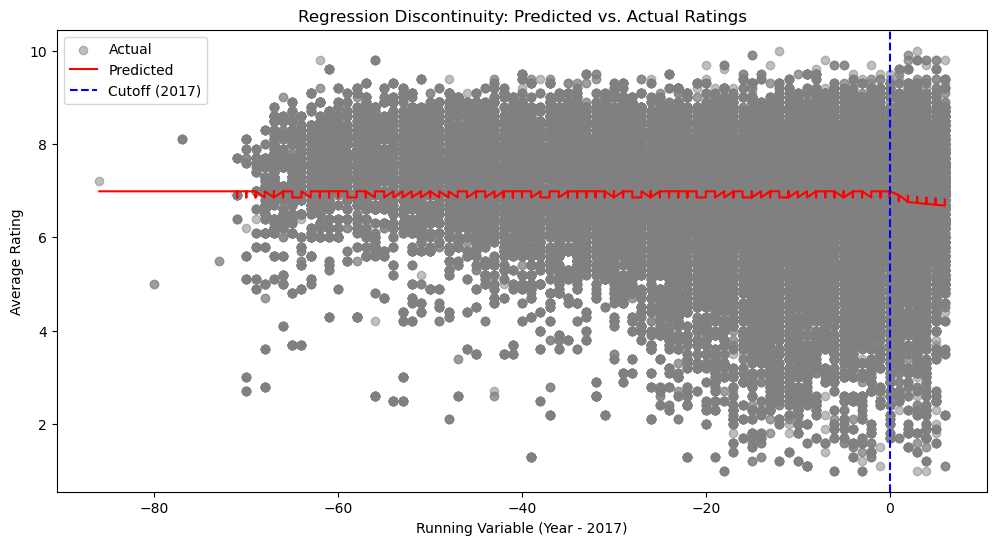

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate the predicted values
merged_df['predicted_rating'] = model.predict(X)

# Plot the raw data
plt.figure(figsize=(12, 6))
plt.scatter(merged_df['running_variable'], y, c='grey', alpha=0.5, label='Actual')

# To plot the predicted values, you need to sort the values by the running variable
sorted_df = merged_df.sort_values('running_variable')

# Now plot the sorted predicted values
plt.plot(sorted_df['running_variable'], sorted_df['predicted_rating'], color='red', label='Predicted')

# Add the cutoff line
plt.axvline(x=0, color='blue', linestyle='--', label='Cutoff (2017)')

# Add labels and legend
plt.xlabel('Running Variable (Year - 2017)')
plt.ylabel('Average Rating')
plt.title('Regression Discontinuity: Predicted vs. Actual Ratings')
plt.legend()

# Show the plot
plt.show()

In [13]:
# MODEL WITH CONTROLS

In [14]:
import statsmodels.api as sm

# Assuming merged_df is your DataFrame
# Filter to include only films with female leads
#female_lead_df = merged_df[merged_df['is_actress'] == 1]

# Running variable: time (year)
merged_df['running_variable'] = merged_df['startYear'] - 2017

# Interaction term
merged_df['interaction'] = merged_df['running_variable'] * merged_df['is_after_2017']

# Selecting relevant columns
X = merged_df[['is_after_2017', 'interaction', 'isAdult', 'is_actress', 'runtimeMinutes', 'numVotes', 'birthYear', 'is_action',
                   'is_romance', 'is_scifi', 'is_drama', 'is_comedy', 'is_adventure', 'is_documentary', 'is_fantasy',
              'is_history', 'is_horror', 'is_biography']]  # Add other controls as needed
X = sm.add_constant(X)  # Adds a constant term to the regression
y = merged_df['averageRating']

# Fitting the model
model = sm.OLS(y, X).fit()

# Viewing the results
print(model.summary())



/var/folders/g5/r6m7zvh93m972bmk3vx2jztr0000gn/T/ipykernel_6015/3803041859.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['running_variable'] = merged_df['startYear'] - 2017
/var/folders/g5/r6m7zvh93m972bmk3vx2jztr0000gn/T/ipykernel_6015/3803041859.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['interaction'] = merged_df['running_variable'] * merged_df['is_after_2017']


                            OLS Regression Results                            
Dep. Variable:          averageRating   R-squared:                       0.080
Model:                            OLS   Adj. R-squared:                  0.080
Method:                 Least Squares   F-statistic:                     882.7
Date:                Mon, 27 Nov 2023   Prob (F-statistic):               0.00
Time:                        12:49:35   Log-Likelihood:            -2.8639e+05
No. Observations:              183602   AIC:                         5.728e+05
Df Residuals:                  183583   BIC:                         5.730e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             23.7687      0.255     93.

In [ ]:
#merged_df = merged_df[(merged_df['startYear'] >= 2000) & (merged_df['startYear'] <= 2023)]

In [ ]:
# GRAPH WITH CONTROLS

/var/folders/g5/r6m7zvh93m972bmk3vx2jztr0000gn/T/ipykernel_6015/2858178583.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['predicted_rating'] = model.predict(X)


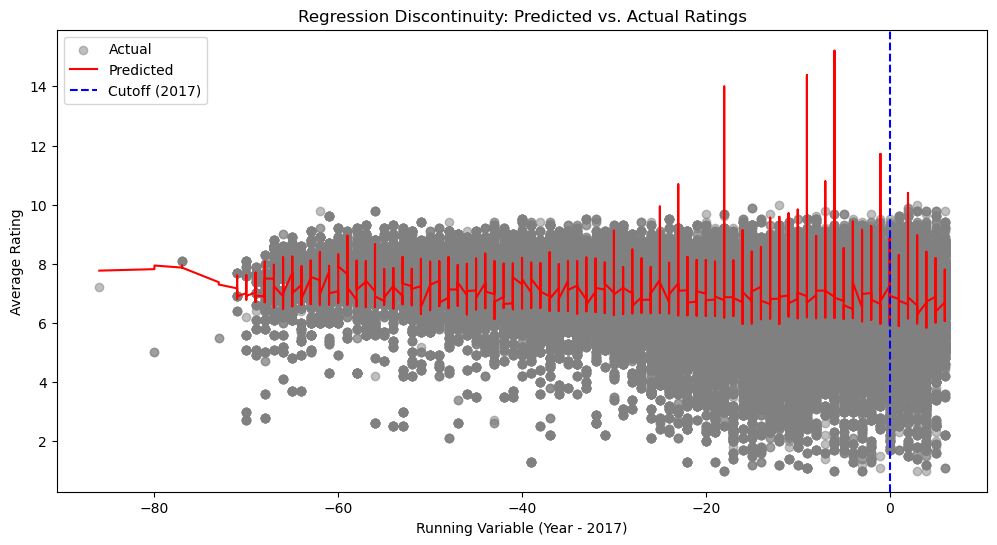

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate the predicted values
merged_df['predicted_rating'] = model.predict(X)

# Plot the raw data
plt.figure(figsize=(12, 6))
plt.scatter(merged_df['running_variable'], y, c='grey', alpha=0.5, label='Actual')

# To plot the predicted values, you need to sort the values by the running variable
sorted_df = merged_df.sort_values('running_variable')

# Now plot the sorted predicted values
plt.plot(sorted_df['running_variable'], sorted_df['predicted_rating'], color='red', label='Predicted')

# Add the cutoff line
plt.axvline(x=0, color='blue', linestyle='--', label='Cutoff (2017)')

# Add labels and legend
plt.xlabel('Running Variable (Year - 2017)')
plt.ylabel('Average Rating')
plt.title('Regression Discontinuity: Predicted vs. Actual Ratings')
plt.legend()

# Show the plot
plt.show()

In [16]:
# Filter to include only films with female leads
female_lead_df = merged_df[merged_df['is_actress'] == 1]
female_lead_df = female_lead_df[(female_lead_df['startYear'] >= 2000) & (female_lead_df['startYear'] <= 2023)]
female_lead_df

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,...,is_comedy,is_adventure,is_documentary,is_fantasy,is_history,is_horror,is_biography,running_variable,interaction,predicted_rating
135946,tt7314988,tvSeries,Sin tu mirada,Sin tu mirada,0,2017.0,2018.0,60.0,Drama,7.4,...,0,0,0,0,0,0,0,0.0,0.0,6.961996
216066,tt1168348,tvMiniSeries,Elles et moi,Elles et moi,0,2008.0,2008.0,222.0,Drama,7.0,...,0,0,0,0,0,0,0,-9.0,-0.0,7.323368
235118,tt1738321,tvMiniSeries,A History of Horror with Mark Gatiss,A History of Horror with Mark Gatiss,0,2010.0,2010.0,177.0,Documentary,8.1,...,0,0,1,0,0,0,0,-7.0,-0.0,7.716555
266039,tt0247859,tvSeries,Carita de ángel,Carita de ángel,0,2000.0,2001.0,60.0,"Comedy,Drama,Family",7.1,...,1,0,0,0,0,0,0,-17.0,-0.0,7.546942
312053,tt1959896,tvMiniSeries,Birth of Hollywood,Birth of Hollywood,0,2011.0,2011.0,60.0,"Documentary,History",7.8,...,0,0,1,0,1,0,0,-6.0,-0.0,8.122495
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11319485,tt9665304,tvSeries,Süphe,Süphe,0,2011.0,2011.0,90.0,Drama,5.2,...,0,0,0,0,0,0,0,-6.0,-0.0,6.786782
11324189,tt9810596,tvSeries,Lavender,Lavender,0,2001.0,2002.0,45.0,"Drama,Romance",6.5,...,0,0,0,0,0,0,0,-16.0,-0.0,6.840200
11324695,tt9826628,tvSeries,Yemin,Yemin,0,2019.0,2022.0,90.0,Drama,6.0,...,0,0,0,0,0,0,0,2.0,2.0,6.719497
11325524,tt9849210,tvSeries,Biohackers,Biohackers,0,2020.0,2021.0,44.0,"Drama,Sci-Fi,Thriller",6.8,...,0,0,0,0,0,0,0,3.0,3.0,6.701143


In [17]:
# Check for missing values
print(female_lead_df.isnull().sum())

# Option 1: Drop rows with missing values
female_lead_df = female_lead_df.dropna()

# Option 2: Fill missing values, e.g., with the mean or median
#female_lead_df = female_lead_df.fillna(female_lead_df.mean())


tconst               0
titleType            0
primaryTitle         0
originalTitle        0
isAdult              0
startYear            0
endYear              0
runtimeMinutes       0
genres               0
averageRating        0
numVotes             0
ordering             0
nconst               0
category             0
job                  0
characters           0
primaryName          0
birthYear            0
deathYear            0
primaryProfession    0
knownForTitles       0
is_actress           0
is_after_2017        0
is_action            0
is_drama             0
is_romance           0
is_scifi             0
is_comedy            0
is_adventure         0
is_documentary       0
is_fantasy           0
is_history           0
is_horror            0
is_biography         0
running_variable     0
interaction          0
predicted_rating     0
dtype: int64


In [18]:
# Check for infinite values
print(female_lead_df.isin([np.inf, -np.inf]).sum())

# Replace infinite values with NaN and then handle NaNs as above
female_lead_df = female_lead_df.replace([np.inf, -np.inf], np.nan)


tconst               0
titleType            0
primaryTitle         0
originalTitle        0
isAdult              0
startYear            0
endYear              0
runtimeMinutes       0
genres               0
averageRating        0
numVotes             0
ordering             0
nconst               0
category             0
job                  0
characters           0
primaryName          0
birthYear            0
deathYear            0
primaryProfession    0
knownForTitles       0
is_actress           0
is_after_2017        0
is_action            0
is_drama             0
is_romance           0
is_scifi             0
is_comedy            0
is_adventure         0
is_documentary       0
is_fantasy           0
is_history           0
is_horror            0
is_biography         0
running_variable     0
interaction          0
predicted_rating     0
dtype: int64


In [19]:
# FEMALE WITHOUT CONTROLS

In [20]:
import statsmodels.api as sm

# Assuming merged_df is your DataFrame
# Filter to include only films with female leads
#female_lead_df = merged_df[merged_df['is_actress'] == 1]

# Running variable: time (year)
female_lead_df['running_variable'] = female_lead_df['startYear'] - 2017

# Interaction term
female_lead_df['interaction'] = female_lead_df['running_variable'] * female_lead_df['is_after_2017']

# Selecting relevant columns
X = female_lead_df[['is_after_2017', 'interaction']]  # Add other controls as needed
X = sm.add_constant(X)  # Adds a constant term to the regression
y = female_lead_df['averageRating']

# Fitting the model
model = sm.OLS(y, X).fit()

# Viewing the results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          averageRating   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     23.57
Date:                Mon, 27 Nov 2023   Prob (F-statistic):           5.86e-11
Time:                        12:52:05   Log-Likelihood:                -69875.
No. Observations:               42122   AIC:                         1.398e+05
Df Residuals:                   42119   BIC:                         1.398e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             6.6868      0.007    927.252

In [21]:
# GRAPH FEMALE WITHOUT CONTROLS

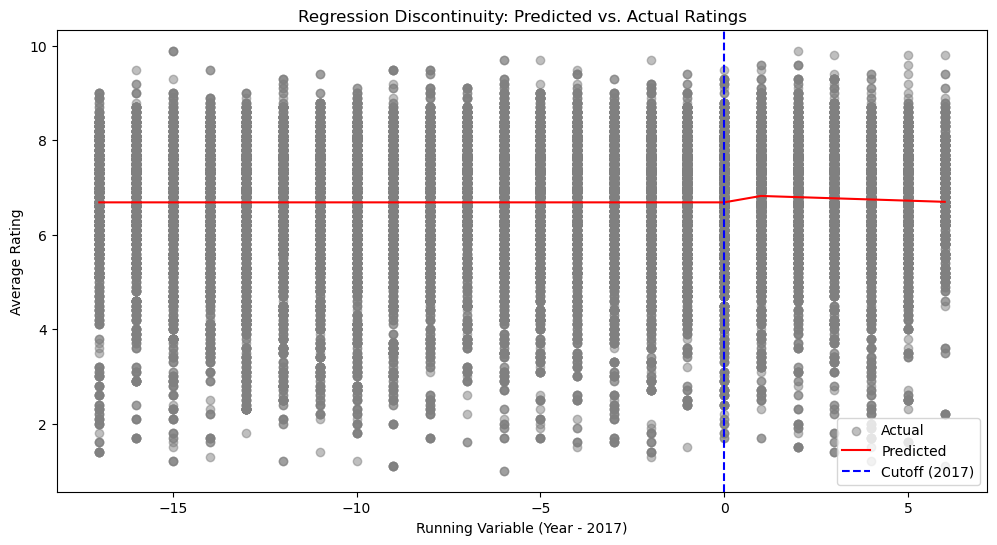

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate the predicted values
female_lead_df['predicted_rating'] = model.predict(X)

# Plot the raw data
plt.figure(figsize=(12, 6))
plt.scatter(female_lead_df['running_variable'], y, c='grey', alpha=0.5, label='Actual')

# To plot the predicted values, you need to sort the values by the running variable
sorted_df = female_lead_df.sort_values('running_variable')

# Now plot the sorted predicted values
plt.plot(sorted_df['running_variable'], sorted_df['predicted_rating'], color='red', label='Predicted')

# Add the cutoff line
plt.axvline(x=0, color='blue', linestyle='--', label='Cutoff (2017)')

# Add labels and legend
plt.xlabel('Running Variable (Year - 2017)')
plt.ylabel('Average Rating')
plt.title('Regression Discontinuity: Predicted vs. Actual Ratings')
plt.legend()

# Show the plot
plt.show()

In [23]:
# FEMALE WITH CONTROLS

In [24]:
import statsmodels.api as sm

# Assuming merged_df is your DataFrame
# Filter to include only films with female leads
#female_lead_df = merged_df[merged_df['is_actress'] == 1]

# Running variable: time (year)
female_lead_df['running_variable'] = female_lead_df['startYear'] - 2017

# Interaction term
female_lead_df['interaction'] = female_lead_df['running_variable'] * female_lead_df['is_after_2017']

# Selecting relevant columns
X = female_lead_df[['is_after_2017', 'interaction', 'isAdult', 'runtimeMinutes', 'numVotes', 'birthYear', 'is_action',
                   'is_romance', 'is_scifi', 'is_drama', 'is_comedy', 'is_adventure', 'is_documentary', 'is_fantasy',
              'is_history', 'is_horror', 'is_biography']]  # Add other controls as needed
X = sm.add_constant(X)  # Adds a constant term to the regression
y = female_lead_df['averageRating']

# Fitting the model
model = sm.OLS(y, X).fit()

# Viewing the results
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:          averageRating   R-squared:                       0.078
Model:                            OLS   Adj. R-squared:                  0.078
Method:                 Least Squares   F-statistic:                     209.4
Date:                Mon, 27 Nov 2023   Prob (F-statistic):               0.00
Time:                        12:52:12   Log-Likelihood:                -68189.
No. Observations:               42122   AIC:                         1.364e+05
Df Residuals:                   42104   BIC:                         1.366e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              6.5426      0.856      7.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate the predicted values
female_lead_df['predicted_rating'] = model.predict(X)

# Plot the raw data
plt.figure(figsize=(12, 6))
plt.scatter(female_lead_df['running_variable'], y, c='grey', alpha=0.5, label='Actual')

# To plot the predicted values, you need to sort the values by the running variable
sorted_df = female_lead_df.sort_values('running_variable')

# Now plot the sorted predicted values
plt.plot(sorted_df['running_variable'], sorted_df['predicted_rating'], color='red', label='Predicted')

# Add the cutoff line
plt.axvline(x=0, color='blue', linestyle='--', label='Cutoff (2017)')

# Add labels and legend
plt.xlabel('Running Variable (Year - 2017)')
plt.ylabel('Average Rating')
plt.title('Regression Discontinuity: Predicted vs. Actual Ratings')
plt.legend()

# Show the plot
plt.show()


In [ ]:
# WIGGLY COOL, BUT BIG

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate the predicted values
female_lead_df['predicted_rating'] = model.predict(X)

# Plot the raw data
plt.figure(figsize=(12, 6))
plt.scatter(female_lead_df['running_variable'], y, c='grey', alpha=0.5, label='Actual')

# To plot the predicted values, you need to sort the values by the running variable
sorted_df = female_lead_df.sort_values('running_variable')

# Now plot the sorted predicted values
plt.plot(sorted_df['running_variable'], sorted_df['predicted_rating'], color='red', label='Predicted')

# Add the cutoff line
plt.axvline(x=0, color='blue', linestyle='--', label='Cutoff (2017)')

# Add labels and legend
plt.xlabel('Running Variable (Year - 2017)')
plt.ylabel('Average Rating')
plt.title('Regression Discontinuity: Predicted vs. Actual Ratings')
plt.legend()

# Set limit
plt.xlim(-2, 2)

# Show the plot
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot of the data
plt.figure(figsize=(12, 6))
sns.scatterplot(x='startYear', y='averageRating', data=female_lead_df, hue='is_after_2017')

# Separate the data into before and after the cutoff
before_cutoff = female_lead_df[female_lead_df['is_after_2017'] == 0]
#after_cutoff = female_lead_df[female_lead_df['is_after_2017'] == 1]
#before_cutoff = filtered_df[filtered_df['startYear'] <= 2017]
after_cutoff = female_lead_df[female_lead_df['startYear'] >= 2017]

# Fit and plot a linear regression for data before the cutoff
sns.regplot(x='startYear', y='averageRating', data=before_cutoff, scatter=False, label='Before 2017')

# Fit and plot a linear regression for data after the cutoff
sns.regplot(x='startYear', y='averageRating', data=after_cutoff, scatter=False, label='After 2017')

# Cutoff line at 2017
plt.axvline(x=2017, color='red', linestyle='--', label='Cutoff (2017)')

# Labels and legend
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.title('RDD Analysis of Average Ratings of Films with Female Leads')
plt.legend()

# Set limit
plt.xlim(1999.5, 2023.25)

# Show plot
plt.show()


In [ ]:
#before_cutoff

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the DataFrame for the years 2015 to 2020
filtered_df = female_lead_df[(female_lead_df['startYear'] >= 2000) & (female_lead_df['startYear'] <= 2023)]

# Scatter plot of the filtered data
plt.figure(figsize=(12, 6))
sns.scatterplot(x='startYear', y='averageRating', data=filtered_df, hue='is_after_2017')

# Separate the filtered data into before and after the cutoff
before_cutoff = filtered_df[filtered_df['startYear'] <= 2017]
after_cutoff = filtered_df[filtered_df['startYear'] >= 2017]

# Fit and plot a linear regression for filtered data before the cutoff
sns.regplot(x='startYear', y='averageRating', data=before_cutoff, scatter=False, label='Before 2017')

# Fit and plot a linear regression for filtered data after the cutoff
sns.regplot(x='startYear', y='averageRating', data=after_cutoff, scatter=False, label='After 2017')

# Cutoff line at 2017
plt.axvline(x=2017, color='red', linestyle='--', label='Cutoff (2017)')

# Labels and legend
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.title('RDD Analysis of Average Ratings of Films with Female Leads (2015-2018)')
plt.legend()

# Set the x-axis limits to 2015-2020
plt.xlim(2015.75, 2018.25)

# Show plot
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Filter the DataFrame for the years 2000 to 2023
filtered_df = female_lead_df[(female_lead_df['startYear'] >= 2015) & (female_lead_df['startYear'] <= 2023)]

# Scatter plot of the data
plt.figure(figsize=(12, 6))
sns.scatterplot(x='running_variable', y='averageRating', data=filtered_df, hue='is_after_2017', palette=['blue', 'black'])

# Fit a polynomial regression for data before the cutoff
before_cutoff = filtered_df[filtered_df['is_after_2017'] == 0]
z_before = np.polyfit(before_cutoff['running_variable'], before_cutoff['averageRating'], deg=2)
p_before = np.poly1d(z_before)

# Fit a polynomial regression for data after the cutoff
after_cutoff = filtered_df[filtered_df['is_after_2017'] == 1]
z_after = np.polyfit(after_cutoff['running_variable'], after_cutoff['averageRating'], deg=2)
p_after = np.poly1d(z_after)

# Generate a range of values for the running variable
x_range = np.linspace(filtered_df['running_variable'].min(), filtered_df['running_variable'].max(), 100)

# Plot the polynomial regression lines
plt.plot(x_range, p_before(x_range), color='blue', linestyle='-')
plt.plot(x_range, p_after(x_range), color='black', linestyle='-')

# Cutoff line at 0 (since running_variable is relative to the cutoff)
plt.axvline(x=0, color='red', linestyle='--')

# Labels and legend
plt.xlabel('Running Variable (Year - 2017)')
plt.ylabel('Average Rating')
plt.title('RDD Analysis of Average Ratings of Films with Female Leads (2000-2023)')
plt.legend()

# Show plot
plt.show()
